In [25]:
import zipfile
unzip = zipfile.ZipFile('flowers.zip', 'r')
unzip.extractall('flowers')

In [26]:
#import 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [27]:
#Image Preprocessing 
train = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True, shear_range=0.2, zoom_range=0.2,
                           width_shift_range=0.2,height_shift_range=0.2, fill_mode='nearest', validation_split=0.3)

img_size = 128
batch_size = 25



traindata = train.flow_from_directory('flowers/train', target_size = (img_size, img_size), batch_size = batch_size, 
                                      class_mode='categorical', subset='training')
validationdata = train.flow_from_directory('flowers/train', target_size = (img_size, img_size), batch_size = batch_size, 
                                           class_mode = 'categorical', subset='validation')

train_steps = traindata.n/traindata.batch_size
validation_steps = validationdata.n/validationdata.batch_size

Found 1924 images belonging to 5 classes.
Found 822 images belonging to 5 classes.


In [51]:
#Buiding a Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 16, 16, 128)    

In [31]:
showmodel = model.fit_generator(traindata, steps_per_epoch=train_steps, epochs=10, validation_data=validationdata, validation_steps=validation_steps)

C:\Users\2543b\AppData\Local\Temp/ipykernel_14032/2961646833.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  showmodel = model.fit_generator(traindata, steps_per_epoch=train_steps, epochs=10, validation_data=validationdata, validation_steps=validation_steps)


Epoch 1/10
76/76 [==============================] - 71s 910ms/step - loss: 1.5151 - accuracy: 0.3482 - val_loss: 1.2283 - val_accuracy: 0.4355
Epoch 2/10
76/76 [==============================] - 65s 844ms/step - loss: 1.1896 - accuracy: 0.5042 - val_loss: 1.1877 - val_accuracy: 0.4647
Epoch 3/10
76/76 [==============================] - 56s 723ms/step - loss: 1.0858 - accuracy: 0.5634 - val_loss: 1.0835 - val_accuracy: 0.5669
Epoch 4/10
76/76 [==============================] - 54s 694ms/step - loss: 0.9808 - accuracy: 0.6055 - val_loss: 1.0061 - val_accuracy: 0.5937
Epoch 5/10
76/76 [==============================] - 59s 768ms/step - loss: 0.9176 - accuracy: 0.6419 - val_loss: 0.9536 - val_accuracy: 0.6010
Epoch 6/10
76/76 [==============================] - 59s 759ms/step - loss: 0.8405 - accuracy: 0.6694 - val_loss: 0.9467 - val_accuracy: 0.6277
Epoch 7/10
76/76 [==============================] - 56s 721ms/step - loss: 0.8466 - accuracy: 0.6726 - val_loss: 0.9293 - val_accuracy: 0.6180

In [40]:
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['accuracy'][-1])
    print('Last validation accuracy: %s'%history.history['val_accuracy'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.7032224535942078
Last validation accuracy: 0.687347948551178


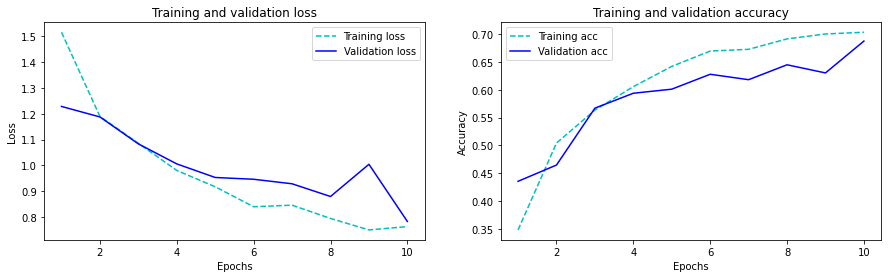

In [41]:
show_result(showmodel)

In [49]:
model.save('baseline_model_itr20.h5')

In [53]:
# เปลี่ยน batch size / learning rate
train_steps = traindata.n/50
validation_steps = validationdata.n/50

showmodel2 = model.fit_generator(traindata, steps_per_epoch=train_steps, epochs=10, validation_data=validationdata, validation_steps=validation_steps)

Epoch 1/10


C:\Users\2543b\AppData\Local\Temp/ipykernel_14032/1579739469.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  showmodel2 = model.fit_generator(traindata, steps_per_epoch=train_steps, epochs=10, validation_data=validationdata, validation_steps=validation_steps)


38/38 [==============================] - 28s 733ms/step - loss: 1.0933 - accuracy: 0.5538 - val_loss: 1.1227 - val_accuracy: 0.5412
Epoch 2/10
38/38 [==============================] - 27s 698ms/step - loss: 1.0363 - accuracy: 0.5918 - val_loss: 1.0291 - val_accuracy: 0.5953
Epoch 3/10
38/38 [==============================] - 30s 794ms/step - loss: 0.9791 - accuracy: 0.6021 - val_loss: 0.9787 - val_accuracy: 0.6188
Epoch 4/10
38/38 [==============================] - 32s 832ms/step - loss: 0.9358 - accuracy: 0.6359 - val_loss: 1.0407 - val_accuracy: 0.5529
Epoch 5/10
38/38 [==============================] - 29s 743ms/step - loss: 0.9259 - accuracy: 0.6431 - val_loss: 0.9456 - val_accuracy: 0.6282
Epoch 6/10
38/38 [==============================] - 29s 747ms/step - loss: 0.8887 - accuracy: 0.6390 - val_loss: 0.9125 - val_accuracy: 0.6306
Epoch 7/10
38/38 [==============================] - 29s 747ms/step - loss: 0.8536 - accuracy: 0.6667 - val_loss: 0.9510 - val_accuracy: 0.6235
Epoch 8/10

Last train accuracy: 0.6827515363693237
Last validation accuracy: 0.6117647290229797


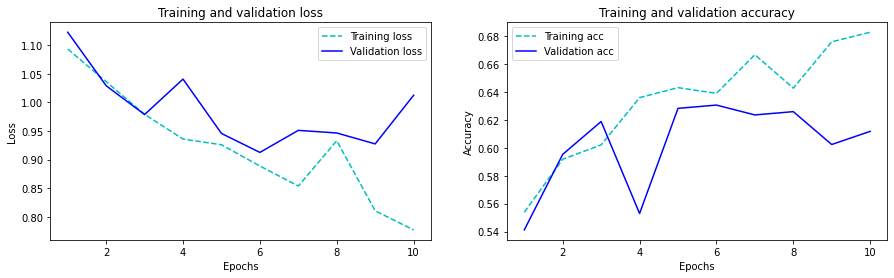

In [54]:
show_result(showmodel2)

### จาก showmodel กราฟ loss จะเห็นว่าทั้ง Training Loss และ  Validation Loss มีค่าลดลงอย่างต่อเนื่อง และมี gap ระหว่างกันเล็กน้อย แสดงว่า model มี Generalization ที่ดี

### แต่ showmodel2 ที่มี learning rate เพิ่มขึ้นเป็น 2 เท่า จากที่กำหนดตอนแรก กราฟ loss จะเห็นว่า Training Loss และ  Validation Loss มีค่าลดลงอย่างต่อเนื่อง แต่เมื่อถึงจุดหนึ่ง Validation Loss กลับสูงขึ้น แปลว่ามี ปัญหา Overfitting

### เกรียงไกร 62070505222